## Analyzing the Impact The Inflation Reduction Act Had on Inlfation

### Get Data from Fred API 

In [1]:
import pandas as pd 
import matplotlib as plt 
import numpy as np 

import fredapi as fd 
import plotly.express as px


In [2]:
fred=fd.Fred(api_key='d376866b204fcf739250046f7c16f5aa')

In [3]:
data = fred.search("Consumer Price Index for All Urban Consumers: All Items in U.S. City Average")
data.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-05-29,2024-05-29,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-04-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-05-15 07:40:37-05:00,95,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2024-05-29,2024-05-29,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2024-04-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-05-15 07:40:51-05:00,73,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2024-05-29,2024-05-29,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-01-11 07:40:07-06:00,46,None
CPILFESL,CPILFESL,2024-05-29,2024-05-29,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-04-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-05-15 07:40:49-05:00,82,"The ""Consumer Price Index for All Urban Consum..."
CPILFENS,CPILFENS,2024-05-29,2024-05-29,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-04-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-05-15 07:40:56-05:00,53,The “Consumer Price Index for All Urban Consum...
CUUS0000SA0L1E,CUUS0000SA0L1E,2024-05-29,2024-05-29,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-01-11 07:40:13-06:00,10,None
APU0000708111,APU0000708111,2024-05-29,2024-05-29,"Average Price: Eggs, Grade A, Large (Cost per ...",1980-01-01,2024-04-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-05-15 07:34:02-05:00,76,"Large white, Grade A chicken eggs, sold in a c..."
APU0000703112,APU0000703112,2024-05-29,2024-05-29,"Average Price: Ground Beef, 100% Beef (Cost pe...",1984-01-01,2024-04-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-05-15 07:34:02-05:00,68,Fresh regular 100% ground beef excluding round...
APU0000702111,APU0000702111,2024-05-29,2024-05-29,"Average Price: Bread, White, Pan (Cost per Pou...",1980-01-01,2024-04-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-05-15 07:34:03-05:00,68,All white pre-packaged regular bread regardles...


In [4]:
cpi = fred.get_series('CPIAUCSL', units='pc1')
cpi.name = 'values'
cpi

1947-01-01        NaN
1947-02-01        NaN
1947-03-01        NaN
1947-04-01        NaN
1947-05-01        NaN
               ...   
2023-12-01    3.32316
2024-01-01    3.10598
2024-02-01    3.16574
2024-03-01    3.47513
2024-04-01    3.35773
Name: values, Length: 928, dtype: float64

In [6]:
df = pd.DataFrame(cpi).reset_index()
df

,index,values
0,1947-01-01,NaN
1,1947-02-01,NaN
2,1947-03-01,NaN
3,1947-04-01,NaN
4,1947-05-01,NaN
...,...,...
923,2023-12-01,3.32316
924,2024-01-01,3.10598
925,2024-02-01,3.16574
926,2024-03-01,3.47513


Split the data into before Inflation Reduction Act, and after 

In [19]:
df_pre_ira = df[df['index'] > '2015-12-01']
df_pre_ira = df_pre_ira[df_pre_ira['index'] < '2022-08-01']
df_post_ira = df[df['index'] >= '2022-08-01']
df_pre_ira

,index,values
828,2016-01-01,1.23750
829,2016-02-01,0.84728
830,2016-03-01,0.89162
831,2016-04-01,1.17263
832,2016-05-01,1.07848
...,...,...
902,2022-03-01,8.54743
903,2022-04-01,8.25186
904,2022-05-01,8.53300
905,2022-06-01,8.98974


Display inflation leading into IRA

In [20]:
fig = px.line(df_pre_ira, x = 'index', y = 'values', title = 'CPI as percent change from year ago before Inflation Reduction Act')
fig.show()

In [21]:
df_pre_ira = df_pre_ira.rename(columns={'index' : "ds", 'values' : "y"})

### Forecast inflation using pre IRA trend 

In [ ]:
from prophet import Prophet

ml = Prophet()
ml.fit(df_pre_ira)


In [23]:
future = ml.make_future_dataframe(periods = 21, freq = 'MS')

In [24]:
result = ml.predict(future)
result[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,1.644520,0.685084,2.532401
1,2016-02-01,1.303134,0.402440,2.224768
2,2016-03-01,1.717563,0.763605,2.674984
3,2016-04-01,1.587516,0.693713,2.529432
4,2016-05-01,1.605252,0.611445,2.609102
...,...,...,...,...
95,2023-12-01,13.550392,12.563687,14.636210
96,2024-01-01,13.423039,12.321786,14.499753
97,2024-02-01,13.367540,12.261146,14.505269
98,2024-03-01,14.049411,12.959034,15.167185


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



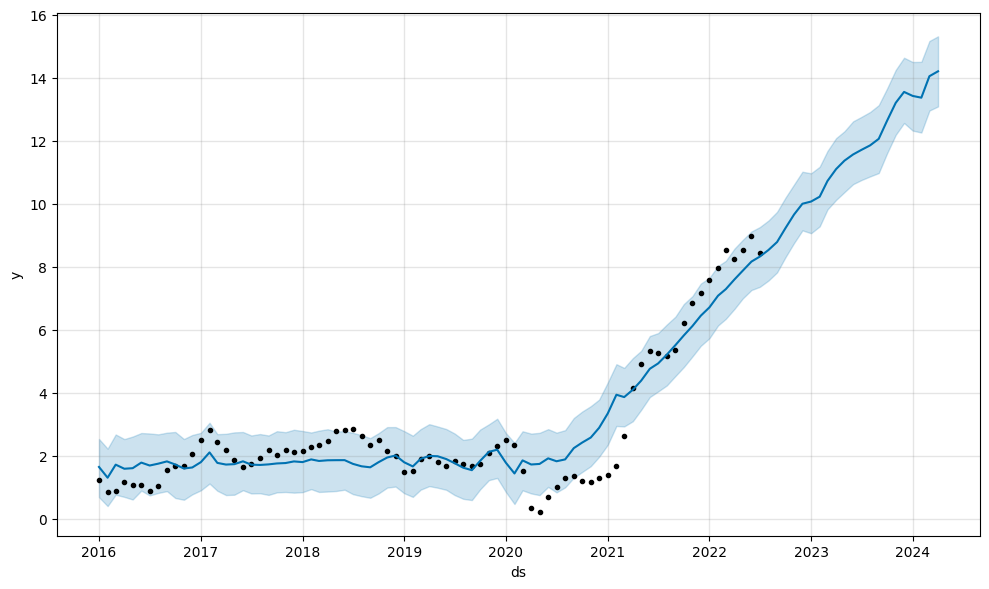

In [55]:
fig=ml.plot(result)

In [47]:
forecasted_cpi = result[result['ds'] >= '2022-08-01']
forecasted_cpi = forecasted_cpi[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_cpi

,ds,yhat,yhat_lower,yhat_upper
79,2022-08-01,8.531504,7.562130,9.466565
80,2022-09-01,8.785398,7.821199,9.742982
81,2022-10-01,9.224819,8.301120,10.190775
82,2022-11-01,9.659324,8.754509,10.611717
83,2022-12-01,10.000160,9.154725,11.016316
84,2023-01-01,10.069916,9.064070,10.966541
85,2023-02-01,10.224486,9.280904,11.174336
86,2023-03-01,10.723322,9.819409,11.675596
87,2023-04-01,11.101359,10.122579,12.082340
88,2023-05-01,11.368604,10.369831,12.301783


In [48]:
df_post_ira = df_post_ira.rename(columns={'index' : "ds", 'values' : "y"})
merged_df = pd.merge(df_post_ira, forecasted_cpi, on = 'ds')
merged_df

,ds,y,yhat,yhat_lower,yhat_upper
0,2022-08-01,8.21881,8.531504,7.562130,9.466565
1,2022-09-01,8.19827,8.785398,7.821199,9.742982
2,2022-10-01,7.75194,9.224819,8.301120,10.190775
3,2022-11-01,7.11947,9.659324,8.754509,10.611717
4,2022-12-01,6.41150,10.000160,9.154725,11.016316
5,2023-01-01,6.36212,10.069916,9.064070,10.966541
6,2023-02-01,5.96552,10.224486,9.280904,11.174336
7,2023-03-01,4.93509,10.723322,9.819409,11.675596
8,2023-04-01,4.94106,11.101359,10.122579,12.082340
9,2023-05-01,4.12069,11.368604,10.369831,12.301783


### Visualize the difference between forecasted and real inflation 

In [49]:
#plot the difference between projected inflation and actual 
fig = px.line(merged_df, x = 'ds', y = 'y', title = 'CPI as percent change from year ago after Inflation Reduction Act')
fig.add_scatter(x = merged_df['ds'], y = merged_df['yhat'], name='Forecasted CPI')
fig.add_scatter(x = merged_df['ds'], y = merged_df['yhat_lower'], name='Lower Bound - Forecasted CPI')
fig.show()

### Measure the effectiveness of IRA 

To be the most accurate we can measure the difference between the forecasted value and the lower bound of the forecast

In [54]:
from sklearn.metrics import mean_absolute_error




mae = mean_absolute_error(merged_df["y"], merged_df["yhat"])
mae_lower = mean_absolute_error(merged_df["y"], merged_df["yhat_lower"])


drop = df_post_ira['y'].iloc[0] - df_post_ira['y'].iloc[-1]

print("Reduction from forecasted value: " + str(round(mae, 2)) + " percent points") 
print("Reduction from lower-bound forecasted value: " + str(round(mae_lower, 2)) + " percent points")
print("Reduction from value when IRA went into affect: " + str(round(drop, 2)) + " percent points")



Reduction from forecasted value: 6.7 percent points
Reduction from lower-bound forecasted value: 5.81 percent points
Reduction from value when IRA went into affect: 4.86 percent points
